In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
df=pd.read_csv('/gdrive/MyDrive/Machine Learning/Machine-Learning-par-la-pratique-avec-Python-master/imports-85.data')


In [4]:
df.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [5]:
headers=['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors',
        'body-style','drive-wheels','engine-location','wheel-base','length','width','height',
         'curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore',
         'stroke','compression-ratio','horsepower','peak-rpm','city-mpg'
        ,'highway-mpg','price']

In [6]:
df=pd.read_csv('/gdrive/MyDrive/Machine Learning/Machine-Learning-par-la-pratique-avec-Python-master/imports-85.data',header=None,names=headers)
df.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [7]:
#Structure de la dataframe

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [9]:
df.replace("?",np.nan,inplace=True)

In [10]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [11]:
df.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [12]:
#Imputation par la moyenne de quelques colones

In [13]:
def imput_avg(x):
  avg=x.astype('float').mean(axis=0)
  return x.replace(np.nan,avg,inplace=True)

In [14]:
for colonne in ['normalized-losses','bore','stroke','horsepower','peak-rpm'] :
  imput_avg(df[colonne])

In [15]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                4
dtype: int64

In [16]:
#imputation par le mode de la variable num-of-doors

In [17]:
mode=df['num-of-doors'].value_counts().idxmax()
mode

'four'

In [18]:
df['num-of-doors'].replace(np.nan,mode,inplace=True)

In [19]:
#Suppression des lignes où il y a des prix manquants
df.dropna(subset=['price'],axis=0,inplace=True)

In [20]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [21]:
df.reset_index(drop=True, inplace=True)

In [22]:
#Format des données
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [ ]:
#conversion au type indiqué sur les infos liées à nos données

In [23]:
df[['bore','stroke','peak-rpm','price']]=df[['bore','stroke','peak-rpm','price']].astype("float")

In [24]:
df[['normalized-losses','horsepower']]=df[['normalized-losses','horsepower']].astype("int")

In [25]:
df.to_csv('/gdrive/MyDrive/Machine Learning/Machine-Learning-par-la-pratique-avec-Python-master/df_clean.csv')

Analyse exploratrice des données 

In [27]:
#CORRELATION

In [28]:
sns.set(rc={'figure.figsize':(14,10)})

In [30]:
mask=np.triu(np.ones_like(df.corr(),dtype=bool))

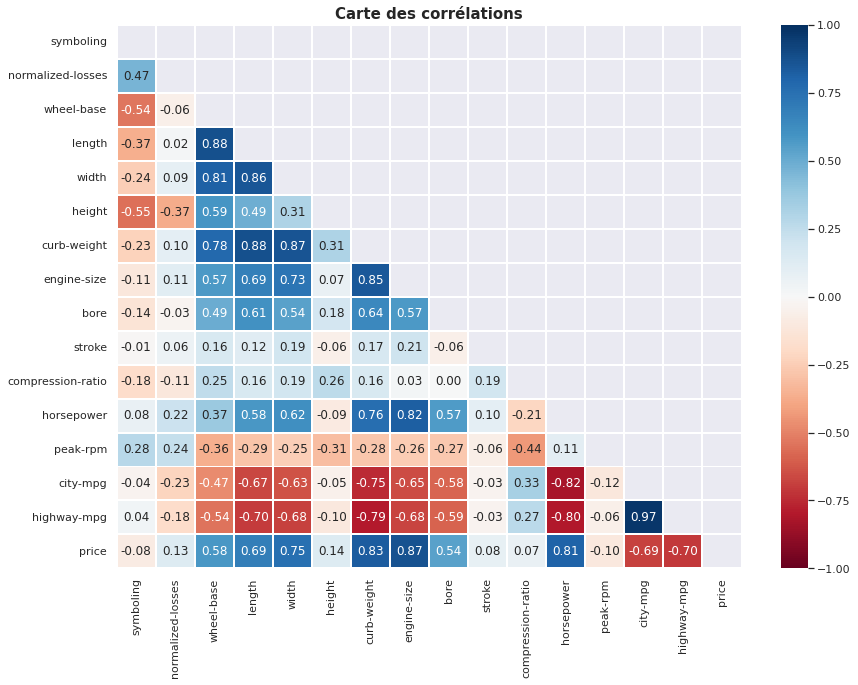

In [33]:
sns.heatmap(df.corr(),mask=mask,center=0,cmap='RdBu',linewidths=1,annot=True,fmt=".2f",vmin=-1,vmax=1)
plt.title('Carte des corrélations',fontsize=15,fontweight="bold")
plt.show()

In [34]:
#Définition d'une fonction slrViz_corr

In [41]:
def slrViz_corr(var):
  sns.regplot(x=var,y=df['price'])
  plt.ylim(0,)
  Pearson_coef,P_value=stats.pearsonr(var,df['price'])
  return print('Le coefficient de corrélation de Pearson est ',Pearson_coef,' avec une P-valeur de ', P_value)

In [36]:
#whell-base VS price

Le coefficient de corrélation de Pearson est  0.584641822265508  avec une P-valeur de  8.076488270733218e-20


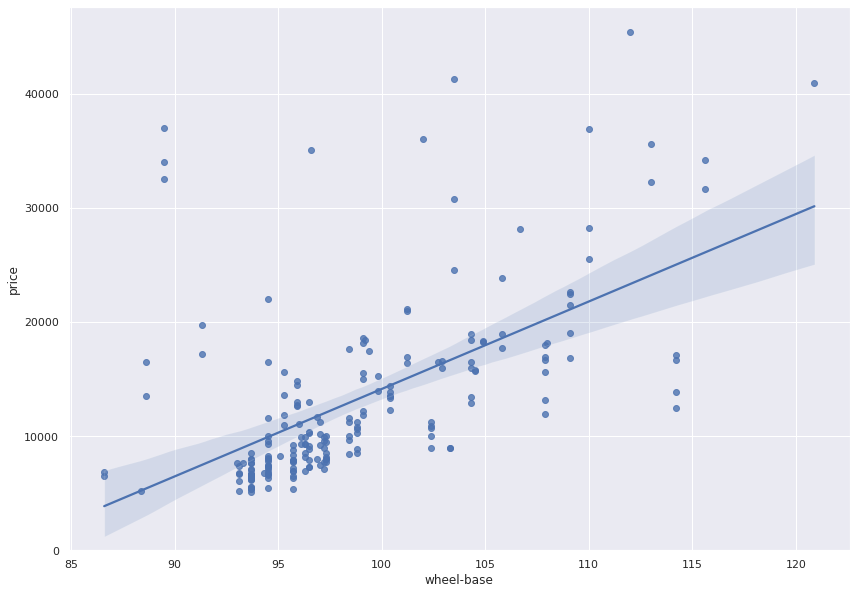

In [42]:

slrViz_corr(df['wheel-base'])

Le coefficient de corrélation de Pearson est  0.6906283804483639  avec une P-valeur de  8.016477466159328e-30


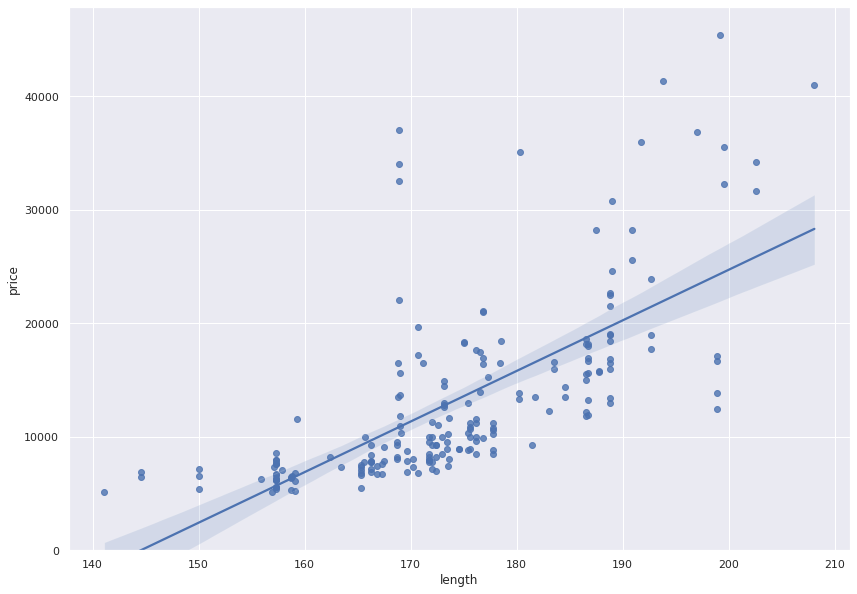

In [44]:
#lengh VS price
slrViz_corr(df['length'])

Le coefficient de corrélation de Pearson est  0.7512653440522674  avec une P-valeur de  9.200335510481516e-38


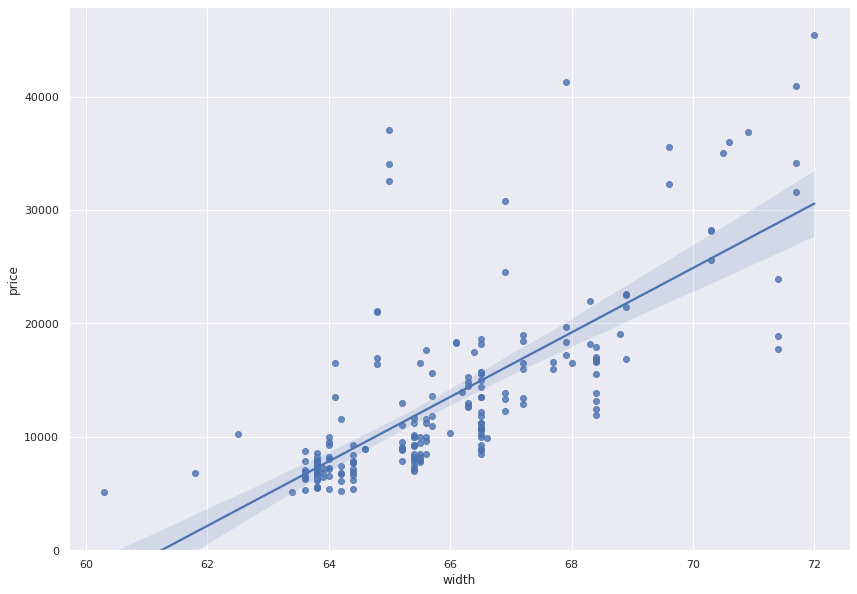

In [45]:
#width VS price
slrViz_corr(df['width'])

Le coefficient de corrélation de Pearson est  0.8344145257702843  avec une P-valeur de  2.189577238894065e-53


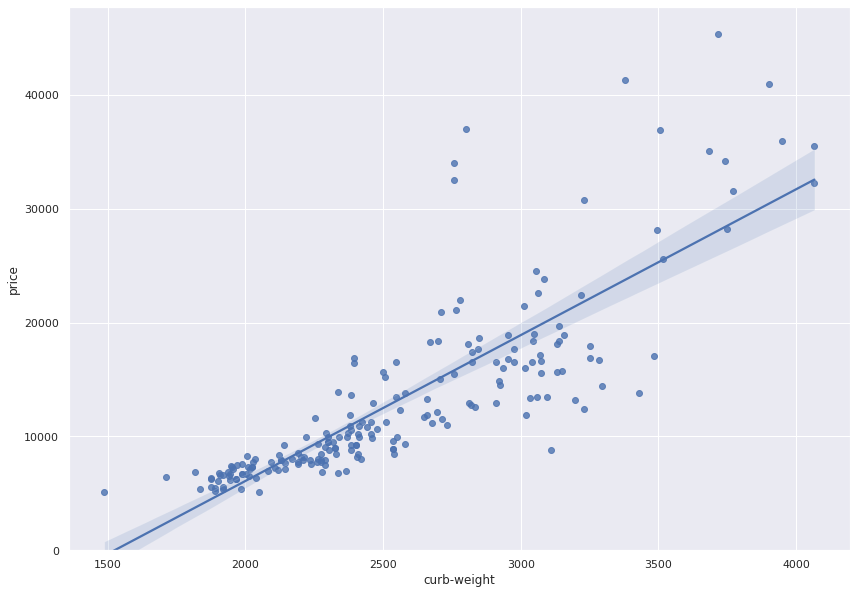

In [47]:
#curb-weight VS price
slrViz_corr(df['curb-weight'])

Le coefficient de corrélation de Pearson est  0.8723351674455185  avec une P-valeur de  9.265491622198389e-64


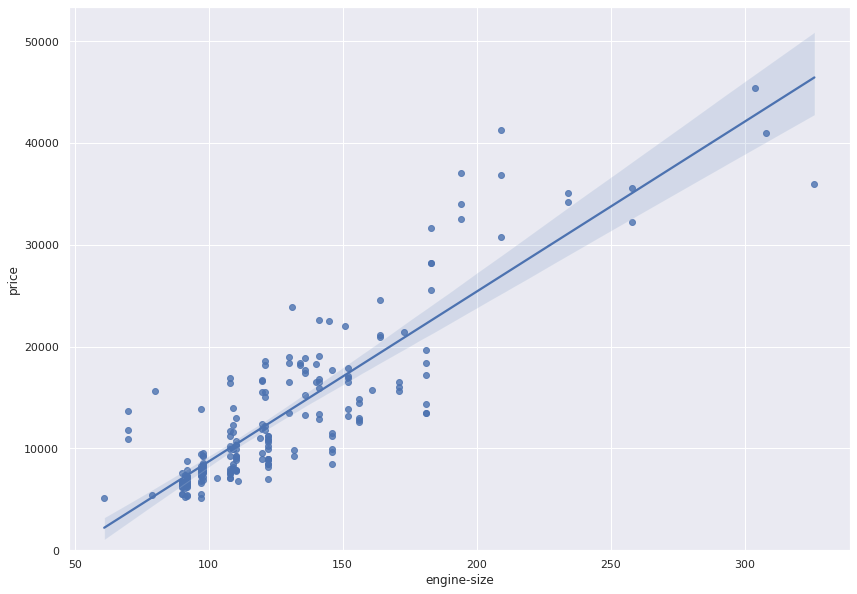

In [48]:
#engine-size VS price
slrViz_corr(df['engine-size'])

Le coefficient de corrélation de Pearson est  0.5431553832626602  avec une P-valeur de  8.049189483935489e-17


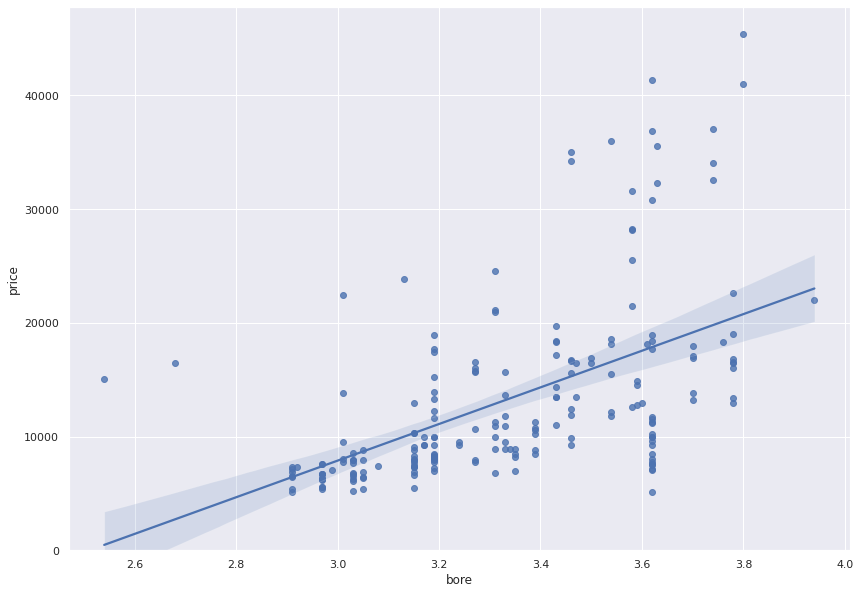

In [50]:
#bore VS price
slrViz_corr(df['bore'])

Le coefficient de corrélation de Pearson est  0.8096068016571054  avec une P-valeur de  6.273536270650504e-48


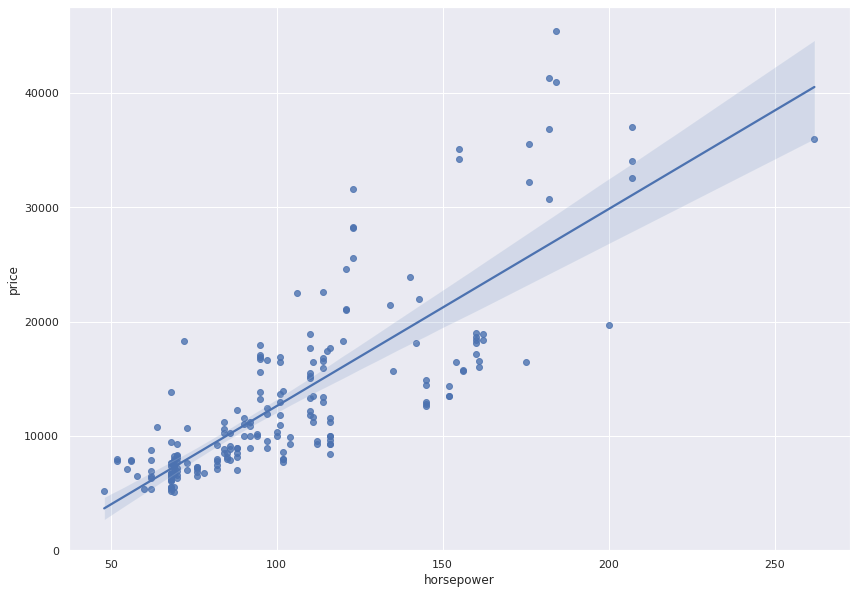

In [51]:
#horsepower VS price
slrViz_corr(df['horsepower'])

Le coefficient de corrélation de Pearson est  -0.6865710067844677  avec une P-valeur de  2.321132065567674e-29


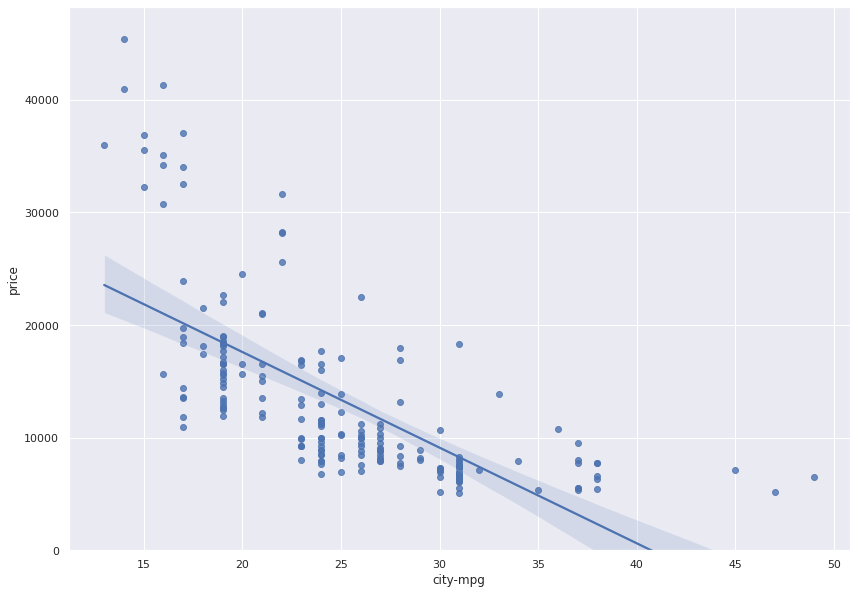

In [52]:
#city-mpg VS price
slrViz_corr(df['city-mpg'])

Le coefficient de corrélation de Pearson est  -0.704692265058953  avec une P-valeur de  1.7495471144476358e-31


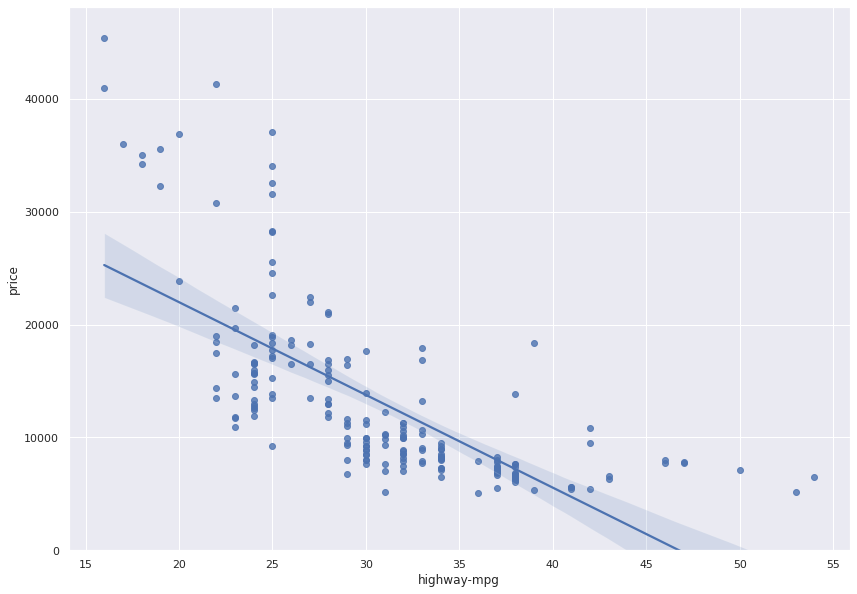

In [55]:
#highway-mpg VS price
slrViz_corr(df['highway-mpg'])

In [56]:
#Variables catégorielles VS variable cible

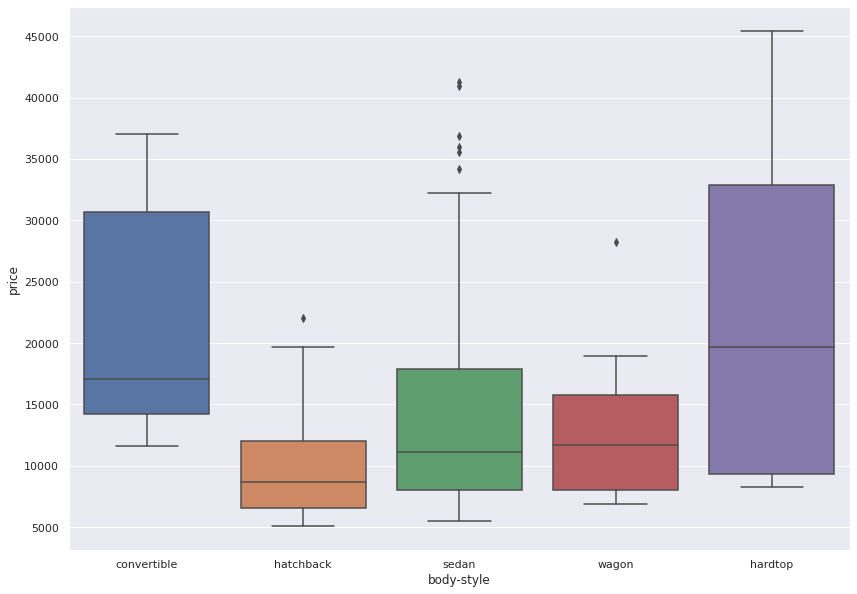

In [58]:
#body-style VS price
sns.boxplot(x='body-style',y='price',data=df)
plt.show()

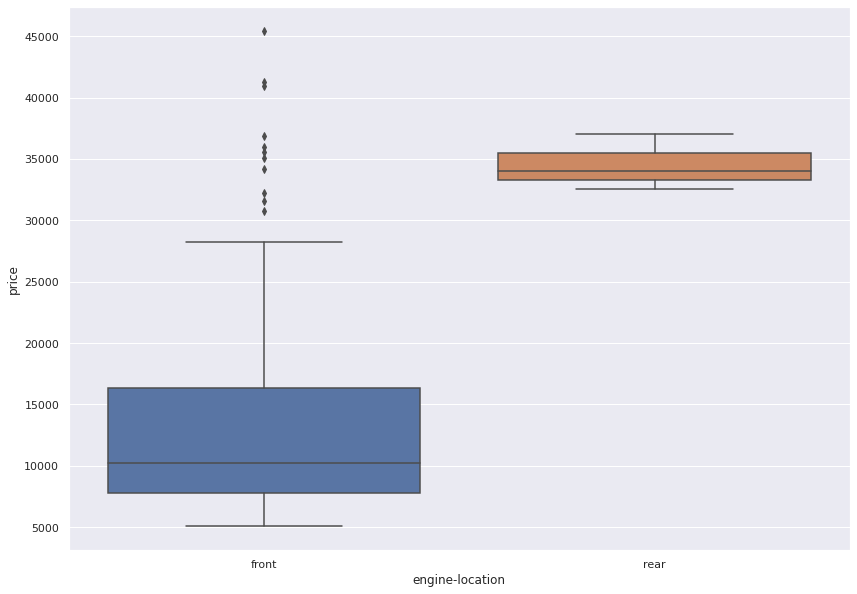

In [59]:
#engine-location VS price
sns.boxplot(x='engine-location',y='price',data=df)
plt.show()

In [60]:
df['engine-location'].value_counts()

front    198
rear       3
Name: engine-location, dtype: int64

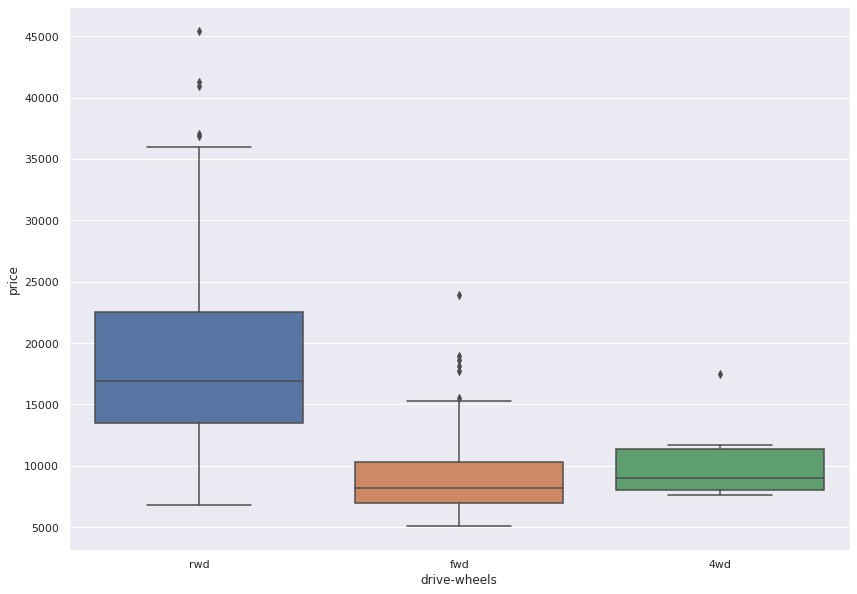

In [61]:
#drive-wheels VS price
sns.boxplot(x='drive-wheels',y='price',data=df)
plt.show()

In [63]:
#Nous utiliserons uniquement les variable quantitative qui on une forte corrélation et la variable catégorrielle 'drive-wheels'
# pour laquelle on  pas un grand chevauchement, ni une disproportion des classes

Modélisation du prix d'une voiture

In [64]:
#Construction du modèle

In [65]:
X=df[['wheel-base','length','width','curb-weight','engine-size','bore','horsepower','city-mpg','highway-mpg']]

In [66]:
y=df['price']

In [67]:
#Création d'un modèle de régression linéaire

In [68]:
lm=LinearRegression()

In [69]:
#entainement du modèle
lm.fit(X,y)

LinearRegression()

In [71]:
LinearRegression(copy_X=True,fit_intercept=True,normalize=False)

LinearRegression(normalize=False)

In [72]:
#coefficients
lm.coef_

array([  111.78344803,   -72.26084531,   634.95267368,     3.11828375,
          79.05419995, -1026.27963187,    59.42633928,  -170.06836451,
         184.10851533])

In [73]:
#Ordonnée à l'origine 
lm.intercept_

-49178.7357331504

Evaluation du modèle

In [74]:
#coefficient de détermination
lm.score(X,y)

0.8190670251946172

In [75]:
#Prix prédit à partir du modèle
Y_hat=lm.predict(X)

In [76]:
#Distribution de valeurs ajuster et des valeurs réelles

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


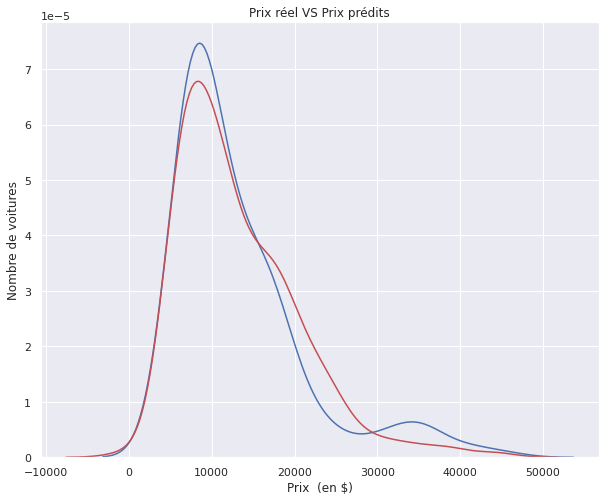

In [79]:
plt.figure(figsize=(10,8))
ax1=sns.distplot(y,hist=False,color="b",label="Prix réels")
sns.distplot(Y_hat,hist=False,color="r",label="Prix prédits",ax=ax1)
plt.title('Prix réel VS Prix prédits')
plt.xlabel('Prix  (en $)')
plt.ylabel('Nombre de voitures')
plt.show()
plt.close()
